# Indicadores
**PEDRO:** Indicadores Macro
- Taxa de Juros
- Inflação EUA
- Inflação EUR
- PIB EUA
- Ouro

**SAMUEL:** Informações da Rede Bitcoin
- Hash Rate 30 day
- Endereços Ativos
- Inflation ratio
- Taxa média por transação
- HODL Waves
- Stock to flow

**LUIS:** Indicadores Técnicos (Médias Móveis e Market Cap)
- Mayer Multiple
- Bitcoin Price Temperatur
- Market Realized Gradient Oscillator
- MVRV
- MVRV Z-Score
- Marketcap to Thermocap

**BRUNO:** Indicadores de Lucratividade e Sentimento
- SOPR
- Relative Unrealized Profits
- Long Term Holders
- CDD
- GOOGLE

# Importando Série Histórica do BTC

In [9]:
import yfinance as yf
data = yf.download("BTC-USD",
                   start = '2009-12-31',
                   period = "max", # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
                   interval = "1d") # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
                   
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


### Criando Stop Loss e Alvo

In [10]:
import pandas as pd
import numpy as np

In [11]:
btc = data.drop(["Adj Close", "Volume"], axis = 1)

btc["retorno"] = (btc["Close"]/btc["Close"].shift())-1
btc.drop(index = btc.index[0], axis = 0, inplace = True)
btc["alvo"] = np.where(btc["retorno"] > 0, 1, 0)

btc["d_max"] = (btc["High"]/btc["Open"])-1
btc["d_min"] = (btc["Open"]/btc["Low"])-1

sd_d_max = btc["d_max"].std()
sd_d_min = btc["d_min"].std()

btc["stop_short"] = np.where(btc["d_max"] > 2*sd_d_max, 1, 0)
btc["stop_long"] = np.where(btc["d_min"] > 2*sd_d_min, 1, 0)
btc["stop_short"] = btc["stop_short"].shift()
btc["stop_long"] = btc["stop_long"].shift()
btc.dropna(inplace = True)
btc["stop_short"] = btc["stop_short"].astype("int64")
btc["stop_long"] = btc["stop_long"].astype("int64")

btc.head()

,Open,High,Low,Close,retorno,alvo,d_max,d_min,stop_short,stop_long
Date,,,,,,,,,,
2014-09-19,424.102997,427.834991,384.532013,394.795990,-0.069843,0,0.008800,0.102907,0,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,0.035735,1,0.072523,0.012286,0,1
2014-09-21,408.084991,412.425995,393.181000,398.821014,-0.024659,0,0.010637,0.037906,1,0
2014-09-22,399.100006,406.915985,397.130005,402.152008,0.008352,1,0.019584,0.004961,0,0
2014-09-23,402.092010,441.557007,396.196991,435.790985,0.083647,1,0.098149,0.014879,0,0


In [59]:
btc_mod = btc.drop(["Open", "High", "Low", "Close", "d_max", "d_min"], axis = 1)
btc_mod.head()

,retorno,alvo,stop_short,stop_long
Date,,,,
2014-09-19,-0.069843,0,0,1
2014-09-20,0.035735,1,0,1
2014-09-21,-0.024659,0,1,0
2014-09-22,0.008352,1,0,0
2014-09-23,0.083647,1,0,0


# Importando Indicadores Luis

In [65]:
indicadores_luis = pd.read_excel("Indicadores Luis.xlsx")
indicadores_luis.index = indicadores_luis["Data"]
indicadores_luis.drop("Data", axis = 1, inplace = True)
indicadores_luis.dropna(inplace = True)
indicadores_luis.head()

,MayerMutiple,BPT,DeltaGradient140,DeltaGradient28,MVRV,MVRVZ,Thermocap
Data,,,,,,,
2014-07-15,1.021983,2.038780,0.106973,0.037486,1.755713,1.275313,7.374967e-07
2014-07-16,1.010268,2.002735,-0.227091,-0.047356,1.739466,1.242097,7.265342e-07
2014-07-17,1.024026,2.030847,-0.168665,0.179207,1.760369,1.282642,7.334942e-07
2014-07-18,1.037499,2.058000,0.065895,0.301997,1.777385,1.305579,7.401664e-07
2014-07-19,1.035571,2.046447,-0.037063,0.283814,1.772745,1.295905,7.357692e-07


# Importando Indicadores Samuel

In [55]:
indicadores_samu = pd.read_excel("Indicadores Samuel.xlsx")
indicadores_samu.index = indicadores_samu["Data"]
indicadores_samu.drop("Data", axis = 1, inplace = True)
indicadores_samu.dropna(inplace = True)
indicadores_samu.head()

,Daily Inflation Ratio,Annual Inflation Rate,Active Addresses,Hash Rate 30 Day,Median Transaction Size
Data,,,,,
2010-07-18,0.249434,91.043564,860,0.000446,0.158804
2010-07-19,0.251700,91.870389,929,0.000494,0.212100
2010-07-20,0.261142,95.316761,936,0.000543,0.102762
2010-07-21,0.297765,108.684082,784,0.000601,1.465068
2010-07-22,0.252532,92.174362,594,0.000649,0.059054


# Importando do Google Trends

In [67]:
def trends_import(palavra):
    import pytrends 
    from pytrends.request import TrendReq
    import pandas as pd
    import datetime
    
    pytrends = TrendReq(hl='en-US', tz=360)
    # build payload
    kw_list = [palavra] # list of keywords to get data 
    pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m')
    data = pytrends.get_historical_interest(kw_list,
                                            year_start=2009,
                                            month_start=1,
                                            day_start=1,
                                            hour_start=0,
                                            year_end=2021,
                                            month_end=12,
                                            day_end=30,
                                            hour_end=0,
                                            cat=0, sleep=0, frequency = "daily")
    return data

In [68]:
trends = trends_import("Bitcoin")
trends.drop("isPartial", axis = 1, inplace = True)
trends.columns = ["Pesquisas"]
trends.head()

,Bitcoin
date,
2009-01-01,0
2009-01-02,0
2009-01-03,0
2009-01-04,0
2009-01-05,0


# Importando do Glassnode

In [ ]:
def glassnode_import(indicador):

    import json
    import requests
    import pandas as pd

    # insert your API key here
    API_KEY = '2DW9AJS0I2CjieLcF9nhVeDVU79'

    # make API request
    res = requests.get(f'https://api.glassnode.com/v1/metrics/indicators/{indicador}', params={'a': 'BTC', 'api_key': API_KEY})

    # convert to pandas dataframe
    df = pd.read_json(res.text, convert_dates=['t'])
    df.rename(columns = {"t" : "date", "v" : indicador}, inplace = True)
    df.index = df["date"]
    df.drop("date", axis = 1, inplace = True)
    return df

### SOPR

É o Spent Output Profit Ratio, ou Proporção de Lucro nos Saldos Gastos.

O SOPR é um indicador muito simples. É calculado a partir dos saldos gastos (spent outputs) de uma transação do Bitcoin. É o valor realizado dos bitcoins (USD) dividido pelo valor dos bitcoins na criação (USD). Ou simplesmente: Preço vendido / Preço pago.

In [15]:
sopr = glassnode_import("sopr")
sopr.head()

,sopr
date,
2010-07-17,1.000000
2010-07-18,1.174760
2010-07-19,1.318536
2010-07-20,1.090517
2010-07-21,1.065532


### Relative Unrealized Profit

Relative Unrealized Profit is defined as the total profit in USD of all coins in existence whose price at realisation time was lower than the current price normalised by the market cap. For more information see this article (https://medium.com/glassnode-insights/dissecting-bitcoins-unrealised-on-chain-profit-loss-73e735020c8d).

In [16]:
unrealized_profit = glassnode_import("unrealized_profit")
unrealized_profit.head()

,unrealized_profit
date,
2010-07-18,0.421756
2010-07-19,0.381980
2010-07-20,0.331170
2010-07-21,0.366785
2010-07-22,0.111389


### CDD
Coin Days Destroyed (CDD) for any given transaction is calculated by taking the number of coins in a transaction and multiplying it by the number of days it has been since those coins were last spent.

In [17]:
cdd = glassnode_import("cdd")
cdd.head()

,cdd
date,
2009-01-12,36.901748
2009-01-13,0.000000
2009-01-14,76.674248
2009-01-15,575.705301
2009-01-16,408.681713


### BVIN
The Bitcoin Volatility Index (BVIN) is an implied volatility index that also represents the fair value of a bitcoin variance swap. The index is calculated by CryptoCompare using options data from Deribit and has been developed in collaboration with Carol Alexander and Arben Imeraj at the University of Sussex Business School. The index is suitable for use as a settlement price for bitcoin volatility futures.

In [26]:
bvin = glassnode_import("bvin")
bvin.head()

,bvin
date,
2020-12-01,0.8462
2020-12-02,0.8195
2020-12-03,0.8159
2020-12-04,0.7881
2020-12-05,0.8008


### Stock to flow ratio e Days Till Halving

In [37]:
stock_to_flow_ratio = glassnode_import("stock_to_flow_ratio")

dys_halving, ratio = [], []
for dicio in stock_to_flow_ratio["o"]:
    dys_halving.append(dicio["daysTillHalving"])
    ratio.append(dicio["ratio"])
    
stock_to_flow_ratio = pd.DataFrame(data = {"dys_halving" : dys_halving, "ratio" : ratio},
                                   index = stock_to_flow_ratio.index)

stock_to_flow_ratio = stock_to_flow_ratio.join(btc["Close"])
stock_to_flow_ratio["dist_BTC_STF"] = stock_to_flow_ratio["ratio"] - stock_to_flow_ratio["Close"]
stock_to_flow_ratio.drop("Close", axis = 1, inplace = True)

stock_to_flow_ratio.head()

,dys_halving,ratio,Close,dist_BTC_STF
date,,,,
2010-01-02,1061,0.006671,NaN,NaN
2010-01-03,1060,0.006872,NaN,NaN
2010-01-04,1059,0.007069,NaN,NaN
2010-01-05,1058,0.007287,NaN,NaN
2010-01-06,1057,0.007467,NaN,NaN


### Unindo Indicadores do Glassnode

In [81]:
# Juntando todos com o primeiro, que não entra no for
nomes = [unrealized_profit, cdd, bvin, stock_to_flow_ratio]

for i in nomes:
    sopr = sopr.join(i)

sopr.head()

ValueError: columns overlap but no suffix specified: Index(['unrealized_profit'], dtype='object')

# Unindo todos os indicadores e exportando arquivo .xlsx

In [84]:
sopr.drop("bvin", axis = 1, inplace = True) # Só tem dados de 2021 pra frente

In [105]:
df = btc_mod.join([sopr, indicadores_samu, indicadores_luis, trends])
df.dropna(inplace=True)

In [106]:
df["alvo"] = df["alvo"].shift(-1)
df.dropna(inplace = True)
df.head()

,retorno,alvo,stop_short,stop_long,sopr,unrealized_profit,cdd,dys_halving,ratio,dist_BTC_STF,...,Hash Rate 30 Day,Median Transaction Size,MayerMutiple,BPT,DeltaGradient140,DeltaGradient28,MVRV,MVRVZ,Thermocap,Pesquisas
2014-09-19,-0.069843,1.0,0,1,0.960788,0.407395,5.086846e+06,659.0,160.856619,-233.939371,...,215494.929418,21.987732,0.728202,0.945028,-0.649644,-1.231281,1.115123,0.196148,4.006317e-07,52.0
2014-09-20,0.035735,0.0,0,1,0.968234,0.409306,1.312297e+07,658.0,161.257585,-247.646407,...,217674.993961,10.687075,0.757593,1.002839,-0.468327,-0.871467,1.166208,0.275693,4.150327e-07,46.0
2014-09-21,-0.024659,1.0,1,0,0.990690,0.407213,4.206708e+06,657.0,161.654983,-237.166031,...,219578.007534,0.310073,0.740529,0.961117,-0.517397,-1.097455,1.136713,0.222286,4.039992e-07,48.0
2014-09-22,0.008352,1.0,0,0,0.983462,0.406914,1.668689e+06,656.0,162.144825,-240.007184,...,221481.179488,12.303057,0.739915,0.954611,-0.495332,-1.061224,1.138848,0.218557,4.019704e-07,46.0
2014-09-23,0.083647,0.0,0,0,0.989714,0.415139,3.871722e+06,655.0,162.834824,-272.956161,...,223126.818317,13.640182,0.816047,1.112054,-0.222805,-0.742435,1.245620,0.403822,4.418545e-07,57.0


# Rodando modelo aleatório

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay
from sklearn.neural_network import MLPClassifier

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
X = df.drop(["retorno", "alvo", "stop_short", "stop_long"], axis = 1)
y = df["alvo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.7, shuffle = False)

In [108]:
modelo = MLPClassifier(random_state = 42, max_iter=1000) # gera um modelo aleatório a cada vez que rodamos o código
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)

In [109]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[ 14 354]
 [ 16 376]]
0.5131578947368421


In [118]:
pd.Series(y_pred, name = "ypred")

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
755    1.0
756    1.0
757    1.0
758    1.0
759    1.0
Name: ypred, Length: 760, dtype: float64

In [122]:
y_test

2021-01-06    1.0
2020-04-30    1.0
2015-03-31    1.0
2018-07-08    0.0
2016-10-19    1.0
             ... 
2018-09-08    1.0
2017-12-16    0.0
2014-10-02    0.0
2018-09-14    1.0
2018-09-05    0.0
Name: alvo, Length: 760, dtype: float64

In [125]:
resultado = pd.DataFrame({"y_p" : y_pred, "y_t" : y_test}).join()

,y_p,y_t
2021-01-06,1.0,1.0
2020-04-30,1.0,1.0
2015-03-31,1.0,1.0
2018-07-08,1.0,0.0
2016-10-19,1.0,1.0
...,...,...
2018-09-08,1.0,1.0
2017-12-16,1.0,0.0
2014-10-02,1.0,0.0
2018-09-14,1.0,1.0


In [131]:
resultado = df[["retorno", "alvo", "stop_short", "stop_long"]].join(pd.DataFrame({"y_p" : y_pred, "y_t" : y_test}))
resultado.dropna(inplace = True)
resultado["ret_p"] = np.where(resultado["y_p"] == 1, resultado["retorno"], -resultado["retorno"])
resultado["ret_t"] = np.where(resultado["y_t"] == 1, resultado["retorno"], -resultado["retorno"])
resultado["ret_p"] = (resultado["ret_p"]+1).cumprod()
resultado["ret_t"] = (resultado["ret_t"]+1).cumprod()

resultado.head()

,retorno,alvo,stop_short,stop_long,y_p,y_t,ret_p,ret_t
2014-10-02,-0.022270,0.0,0,0,1.0,0.0,0.977730,1.022270
2014-10-07,0.018505,1.0,1,0,1.0,1.0,0.995823,1.041186
2014-10-12,0.044852,1.0,0,0,1.0,1.0,1.040488,1.087886
2014-10-14,0.026782,0.0,0,0,1.0,0.0,1.068354,1.058751
2014-10-18,0.020023,0.0,0,0,1.0,0.0,1.089746,1.037551


<AxesSubplot:>

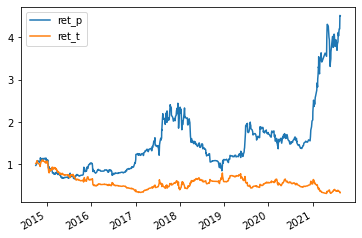

In [134]:
resultado[['ret_p', 'ret_t']].plot(kind = "line")
